In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,precision_recall_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('LoanTapData.csv')
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [6]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [3]:
df[cat_cols].head(3)

NameError: name 'cat_cols' is not defined

<AxesSubplot:xlabel='dti', ylabel='loan_status'>

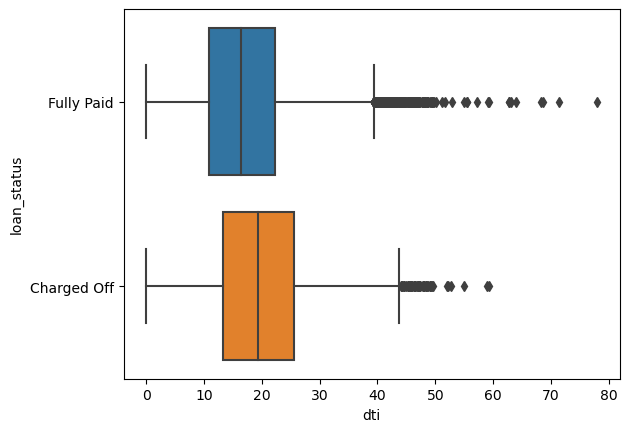

In [140]:
sns.boxplot(data=df[df['dti']<80] ,x='dti',
#                 y=df['application_type']  ,
               y='loan_status')

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

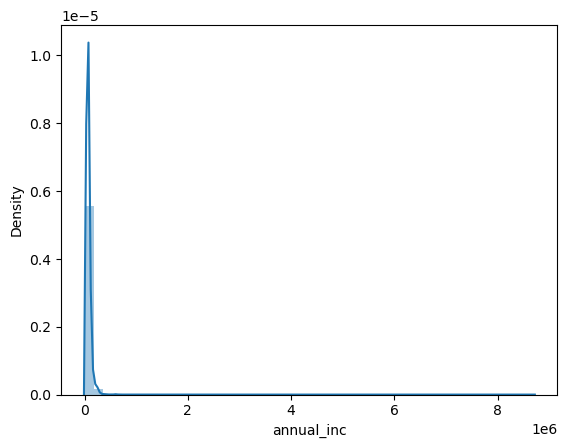

In [113]:
sns.distplot(df['annual_inc'])

In [126]:
(df['annual_inc']<1000000).value_counts()

True     395955
False        75
Name: annual_inc, dtype: int64

In [ ]:
sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


<AxesSubplot:>

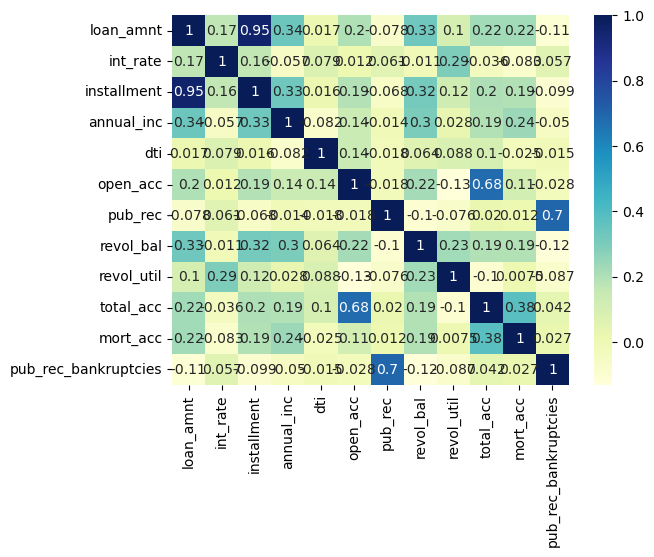

In [6]:

sns.heatmap(df[num_cols].corr(), cmap="YlGnBu", annot=True)

In [94]:
df['emp_length'].apply(lambda x :'' if pd.isna(x) else re.findall(r'\d+',x)[0]).value_counts()

10    126041
1      57607
2      35827
3      31665
5      26495
4      23952
6      20841
7      20819
8      19168
       18301
9      15314
Name: emp_length, dtype: int64

In [5]:
df.shape

(396030, 27)

In [7]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [4]:
num_cols = df.columns[df.dtypes=='float64']
cat_cols = df.columns[df.dtypes=='O']

In [5]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [6]:
df[cat_cols].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [8]:
def parse_numeric(x):
    return '' if pd.isna(x) else re.findall(r'\d+',x)[0]

In [9]:
df[cat_cols].head(3)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [10]:
df['address'].unique()

array(['0174 Michelle Gateway\r\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\r\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597',
       '787 Michelle Causeway\r\nBriannaton, AR 48052'], dtype=object)

In [11]:
df['term'] = df['term'].apply(lambda x : parse_numeric(x)).apply(int)

In [12]:
df['emp_length'] = pd.to_numeric(df['emp_length'].apply(lambda x : parse_numeric(x)), errors='coerce')

In [13]:
grade_dict = dict(zip(list('ABCDEFG'),[i for i in range(7)]))

In [14]:
df['grade'] = df['grade'].replace(grade_dict)

In [15]:
df['sub_grade_1'] = df['sub_grade'].str[1].apply(int)

In [16]:
sub_grade_dict = dict((sg,i+1) for i,sg in enumerate([i+str(j) for i in list('ABCDEFG') for j in range(1,6)]))

In [17]:
df['sub_grade_2'] = df['sub_grade'].replace(sub_grade_dict)

In [18]:
df['sub_grade_2'].unique()

array([ 9, 10,  8,  2, 15, 13,  1,  7, 11,  5, 24,  4,  3, 16, 12,  6, 18,
       20, 17, 21, 22, 25, 29, 23, 19, 31, 30, 32, 14, 26, 28, 35, 34, 27,
       33], dtype=int64)

In [19]:
home_ownership_dict = {'NONE':'OTHER','ANY':'OTHER'}

In [20]:
df['home_ownership'] = df['home_ownership'].replace(home_ownership_dict)

In [21]:
verification_status_dict = dict(zip(['Not Verified', 'Source Verified', 'Verified'],[1,0,0]))

In [22]:
verification_status_dict

{'Not Verified': 1, 'Source Verified': 0, 'Verified': 0}

In [23]:
df['verification_status'] = df['verification_status'].replace(verification_status_dict)

In [24]:
df['issue_d_month'] = pd.to_datetime(df['issue_d']).dt.month
df['issue_d_year'] = pd.to_datetime(df['issue_d']).dt.year

In [25]:
loan_status_dict = dict(zip(['Fully Paid', 'Charged Off'],[0,1]))

In [26]:
df['loan_status'] = df['loan_status'].replace(loan_status_dict)

In [27]:
df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year

In [28]:
initial_list_status_dict = dict(zip(['w', 'f'],[1,0]))

In [29]:
df['initial_list_status'] = df['initial_list_status'].replace(initial_list_status_dict)

In [30]:
df['address'] = df['address'].str[-5:]

In [31]:
df.isna().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                22927
emp_length               18301
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                     1755
dti                          0
earliest_cr_line             0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                 37795
pub_rec_bankruptcies       535
address                      0
sub_grade_1                  0
sub_grade_2                  0
issue_d_month                0
issue_d_year                 0
earliest_cr_line_year        0
dtype: i

In [32]:
flag_columns = df.columns[df.isna().sum()>0]

In [33]:
for col in flag_columns:
    df[col+'_flag'] = df[col].isna().apply(int)

In [34]:
df[flag_columns].head()

,emp_title,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies
0,Marketing,10.0,Vacation,41.8,0.0,0.0
1,Credit analyst,4.0,Debt consolidation,53.3,3.0,0.0
2,Statistician,1.0,Credit card refinancing,92.2,0.0,0.0
3,Client Advocate,6.0,Credit card refinancing,21.5,0.0,0.0
4,Destiny Management Inc.,9.0,Credit Card Refinance,69.8,1.0,0.0


In [35]:
df['emp_length_na'] = df['emp_length'].replace({pd.np.nan:0})

In [36]:
# flag_columns.pop('emp_length')

In [37]:
df['loan_status'].value_counts()

0    318357
1     77673
Name: loan_status, dtype: int64

In [38]:
df['loan_status'].value_counts(normalize=True)*100

0    80.387092
1    19.612908
Name: loan_status, dtype: float64

In [39]:
df.loc[~df['pub_rec_bankruptcies'].isna()]['loan_status'].value_counts(normalize=True)*100

0    80.382559
1    19.617441
Name: loan_status, dtype: float64

In [40]:
df.loc[df['pub_rec_bankruptcies'].isna()]['loan_status'].value_counts(normalize=True)*100

0    83.738318
1    16.261682
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='title', ylabel='count'>

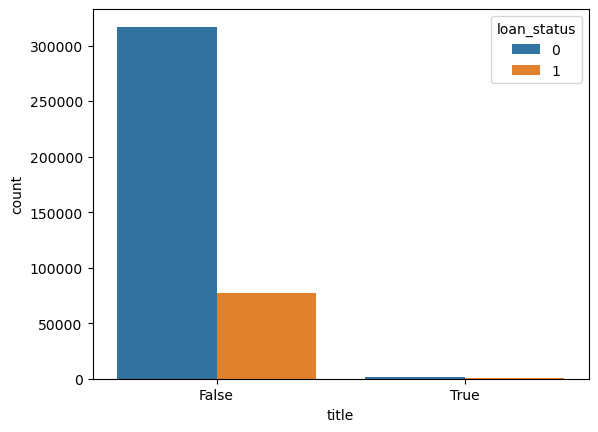

In [41]:
sns.countplot(x=df['title'].isna(),hue=df['loan_status'])

In [42]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,sub_grade_1,sub_grade_2,issue_d_month,issue_d_year,earliest_cr_line_year,emp_title_flag,emp_length_flag,title_flag,revol_util_flag,mort_acc_flag,pub_rec_bankruptcies_flag,emp_length_na
0,10000.0,36,11.44,329.48,1,B4,Marketing,10.0,RENT,117000.0,1,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0,22690,4,9,1,2015,1990,0,0,0,0,0,0,10.0
1,8000.0,36,11.99,265.68,1,B5,Credit analyst,4.0,MORTGAGE,65000.0,1,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0,05113,5,10,1,2015,2004,0,0,0,0,0,0,4.0
2,15600.0,36,10.49,506.97,1,B3,Statistician,1.0,RENT,43057.0,0,Jan-2015,0,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0,05113,3,8,1,2015,2007,0,0,0,0,0,0,1.0


In [43]:
df['total_acc'].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: total_acc, Length: 118, dtype: int64

In [44]:
df['pub_rec_bankruptcies'].describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [46]:
# X.columns

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

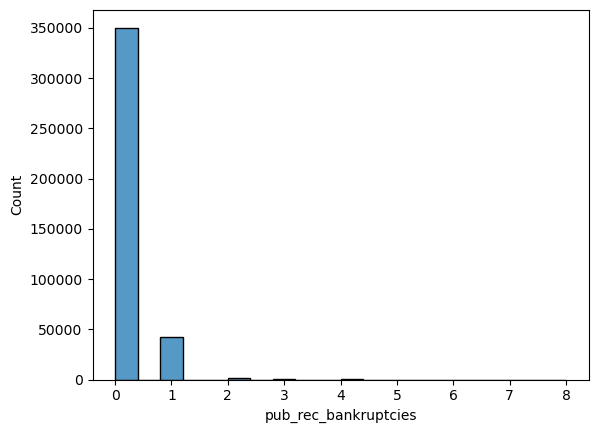

In [590]:
sns.histplot(df['pub_rec_bankruptcies'])

<AxesSubplot:xlabel='dti', ylabel='Count'>

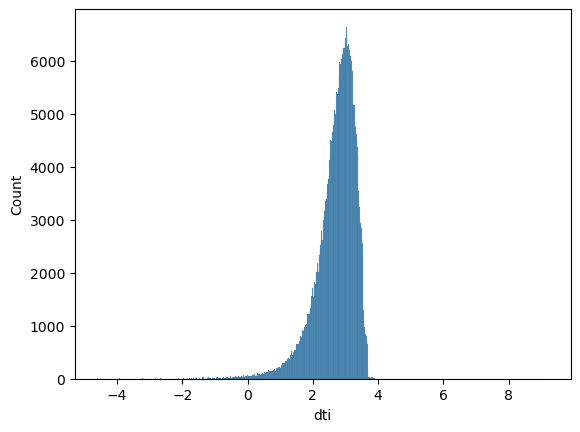

In [591]:
sns.histplot(np.log(df['dti']))

In [47]:
df['annual_inc'] = np.log1p(df['annual_inc'])

In [48]:
df['dti'] = np.log1p(df['dti'])

In [49]:
df['pub_rec'] = df['pub_rec'].apply(lambda x :0 if x==0 else 1)

In [50]:
df['pub_rec_bankruptcies_bool'] = df['pub_rec_bankruptcies'].apply(lambda x :0 if x in [0,pd.np.nan] else 1)

In [51]:
df['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [52]:
df['pub_rec_bankruptcies'].apply(lambda x :0 if x in [0,pd.np.nan] else 1).value_counts(dropna=False)

0    350380
1     45650
Name: pub_rec_bankruptcies, dtype: int64

In [53]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,sub_grade_1,sub_grade_2,issue_d_month,issue_d_year,earliest_cr_line_year,emp_title_flag,emp_length_flag,title_flag,revol_util_flag,mort_acc_flag,pub_rec_bankruptcies_flag,emp_length_na,pub_rec_bankruptcies_bool
0,10000.0,36,11.44,329.48,1,B4,Marketing,10.0,RENT,11.669938,1,Jan-2015,0,vacation,Vacation,3.304686,Jun-1990,16.0,0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0,22690,4,9,1,2015,1990,0,0,0,0,0,0,10.0,0
1,8000.0,36,11.99,265.68,1,B5,Credit analyst,4.0,MORTGAGE,11.082158,1,Jan-2015,0,debt_consolidation,Debt consolidation,3.137666,Jul-2004,17.0,0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0,05113,5,10,1,2015,2004,0,0,0,0,0,0,4.0,0
2,15600.0,36,10.49,506.97,1,B3,Statistician,1.0,RENT,10.670303,0,Jan-2015,0,credit_card,Credit card refinancing,2.623944,Aug-2007,13.0,0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0,05113,3,8,1,2015,2007,0,0,0,0,0,0,1.0,0
3,7200.0,36,6.49,220.65,0,A2,Client Advocate,6.0,RENT,10.896758,1,Nov-2014,0,credit_card,Credit card refinancing,1.280934,Sep-2006,6.0,0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0,00813,2,2,11,2014,2006,0,0,0,0,0,0,6.0,0
4,24375.0,60,17.27,609.33,2,C5,Destiny Management Inc.,9.0,MORTGAGE,10.915107,0,Apr-2013,1,credit_card,Credit Card Refinance,3.553918,Mar-1999,13.0,0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0,11650,5,15,4,2013,1999,0,0,0,0,0,0,9.0,0


In [54]:
df[df.columns[df.dtypes=='O']].head()

,sub_grade,emp_title,home_ownership,issue_d,purpose,title,earliest_cr_line,application_type,address
0,B4,Marketing,RENT,Jan-2015,vacation,Vacation,Jun-1990,INDIVIDUAL,22690
1,B5,Credit analyst,MORTGAGE,Jan-2015,debt_consolidation,Debt consolidation,Jul-2004,INDIVIDUAL,05113
2,B3,Statistician,RENT,Jan-2015,credit_card,Credit card refinancing,Aug-2007,INDIVIDUAL,05113
3,A2,Client Advocate,RENT,Nov-2014,credit_card,Credit card refinancing,Sep-2006,INDIVIDUAL,00813
4,C5,Destiny Management Inc.,MORTGAGE,Apr-2013,credit_card,Credit Card Refinance,Mar-1999,INDIVIDUAL,11650


In [55]:
dummies = ['home_ownership', 'application_type','address']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [56]:
list(df.columns)

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'mort_acc',
 'pub_rec_bankruptcies',
 'sub_grade_1',
 'sub_grade_2',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_year',
 'emp_title_flag',
 'emp_length_flag',
 'title_flag',
 'revol_util_flag',
 'mort_acc_flag',
 'pub_rec_bankruptcies_flag',
 'emp_length_na',
 'pub_rec_bankruptcies_bool',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'application_type_INDIVIDUAL',
 'application_type_JOINT',
 'address_05113',
 'address_11650',
 'address_22690',
 'address_29597',
 'address_30723',
 'address_48052',
 'address_70466',
 'address_86630',
 'address_93700']

In [57]:
flag_columns

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [290]:
# drop_list = list(set(list(flag_columns)+list(df.columns[df.dtypes=='O'])))
# drop_list = [l for l in drop_list if l not in dummies]
drop_list

['emp_length',
 'issue_d',
 'emp_title',
 'sub_grade',
 'pub_rec_bankruptcies',
 'revol_util',
 'title',
 'purpose',
 'earliest_cr_line',
 'mort_acc']

In [59]:
data = df.drop(columns=drop_list)

In [60]:
data.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,sub_grade_1,sub_grade_2,issue_d_month,issue_d_year,earliest_cr_line_year,emp_title_flag,emp_length_flag,title_flag,revol_util_flag,mort_acc_flag,pub_rec_bankruptcies_flag,emp_length_na,pub_rec_bankruptcies_bool,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_INDIVIDUAL,application_type_JOINT,address_05113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700
0,10000.0,36,11.44,329.48,1,11.669938,1,0,3.304686,16.0,0,36369.0,25.0,1,4,9,1,2015,1990,0,0,0,0,0,0,10.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,1,11.082158,1,0,3.137666,17.0,0,20131.0,27.0,0,5,10,1,2015,2004,0,0,0,0,0,0,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,1,10.670303,0,0,2.623944,13.0,0,11987.0,26.0,0,3,8,1,2015,2007,0,0,0,0,0,0,1.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,0,10.896758,1,0,1.280934,6.0,0,5472.0,13.0,0,2,2,11,2014,2006,0,0,0,0,0,0,6.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,2,10.915107,0,1,3.553918,13.0,0,24584.0,43.0,0,5,15,4,2013,1999,0,0,0,0,0,0,9.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [61]:
spearman_corr = data.corr(method='spearman')
pearson_corr = data.corr()

In [ ]:
spearman_corr = (100*spearman_corr).round(2)
pearson_corr = (100*pearson_corr).round(2)

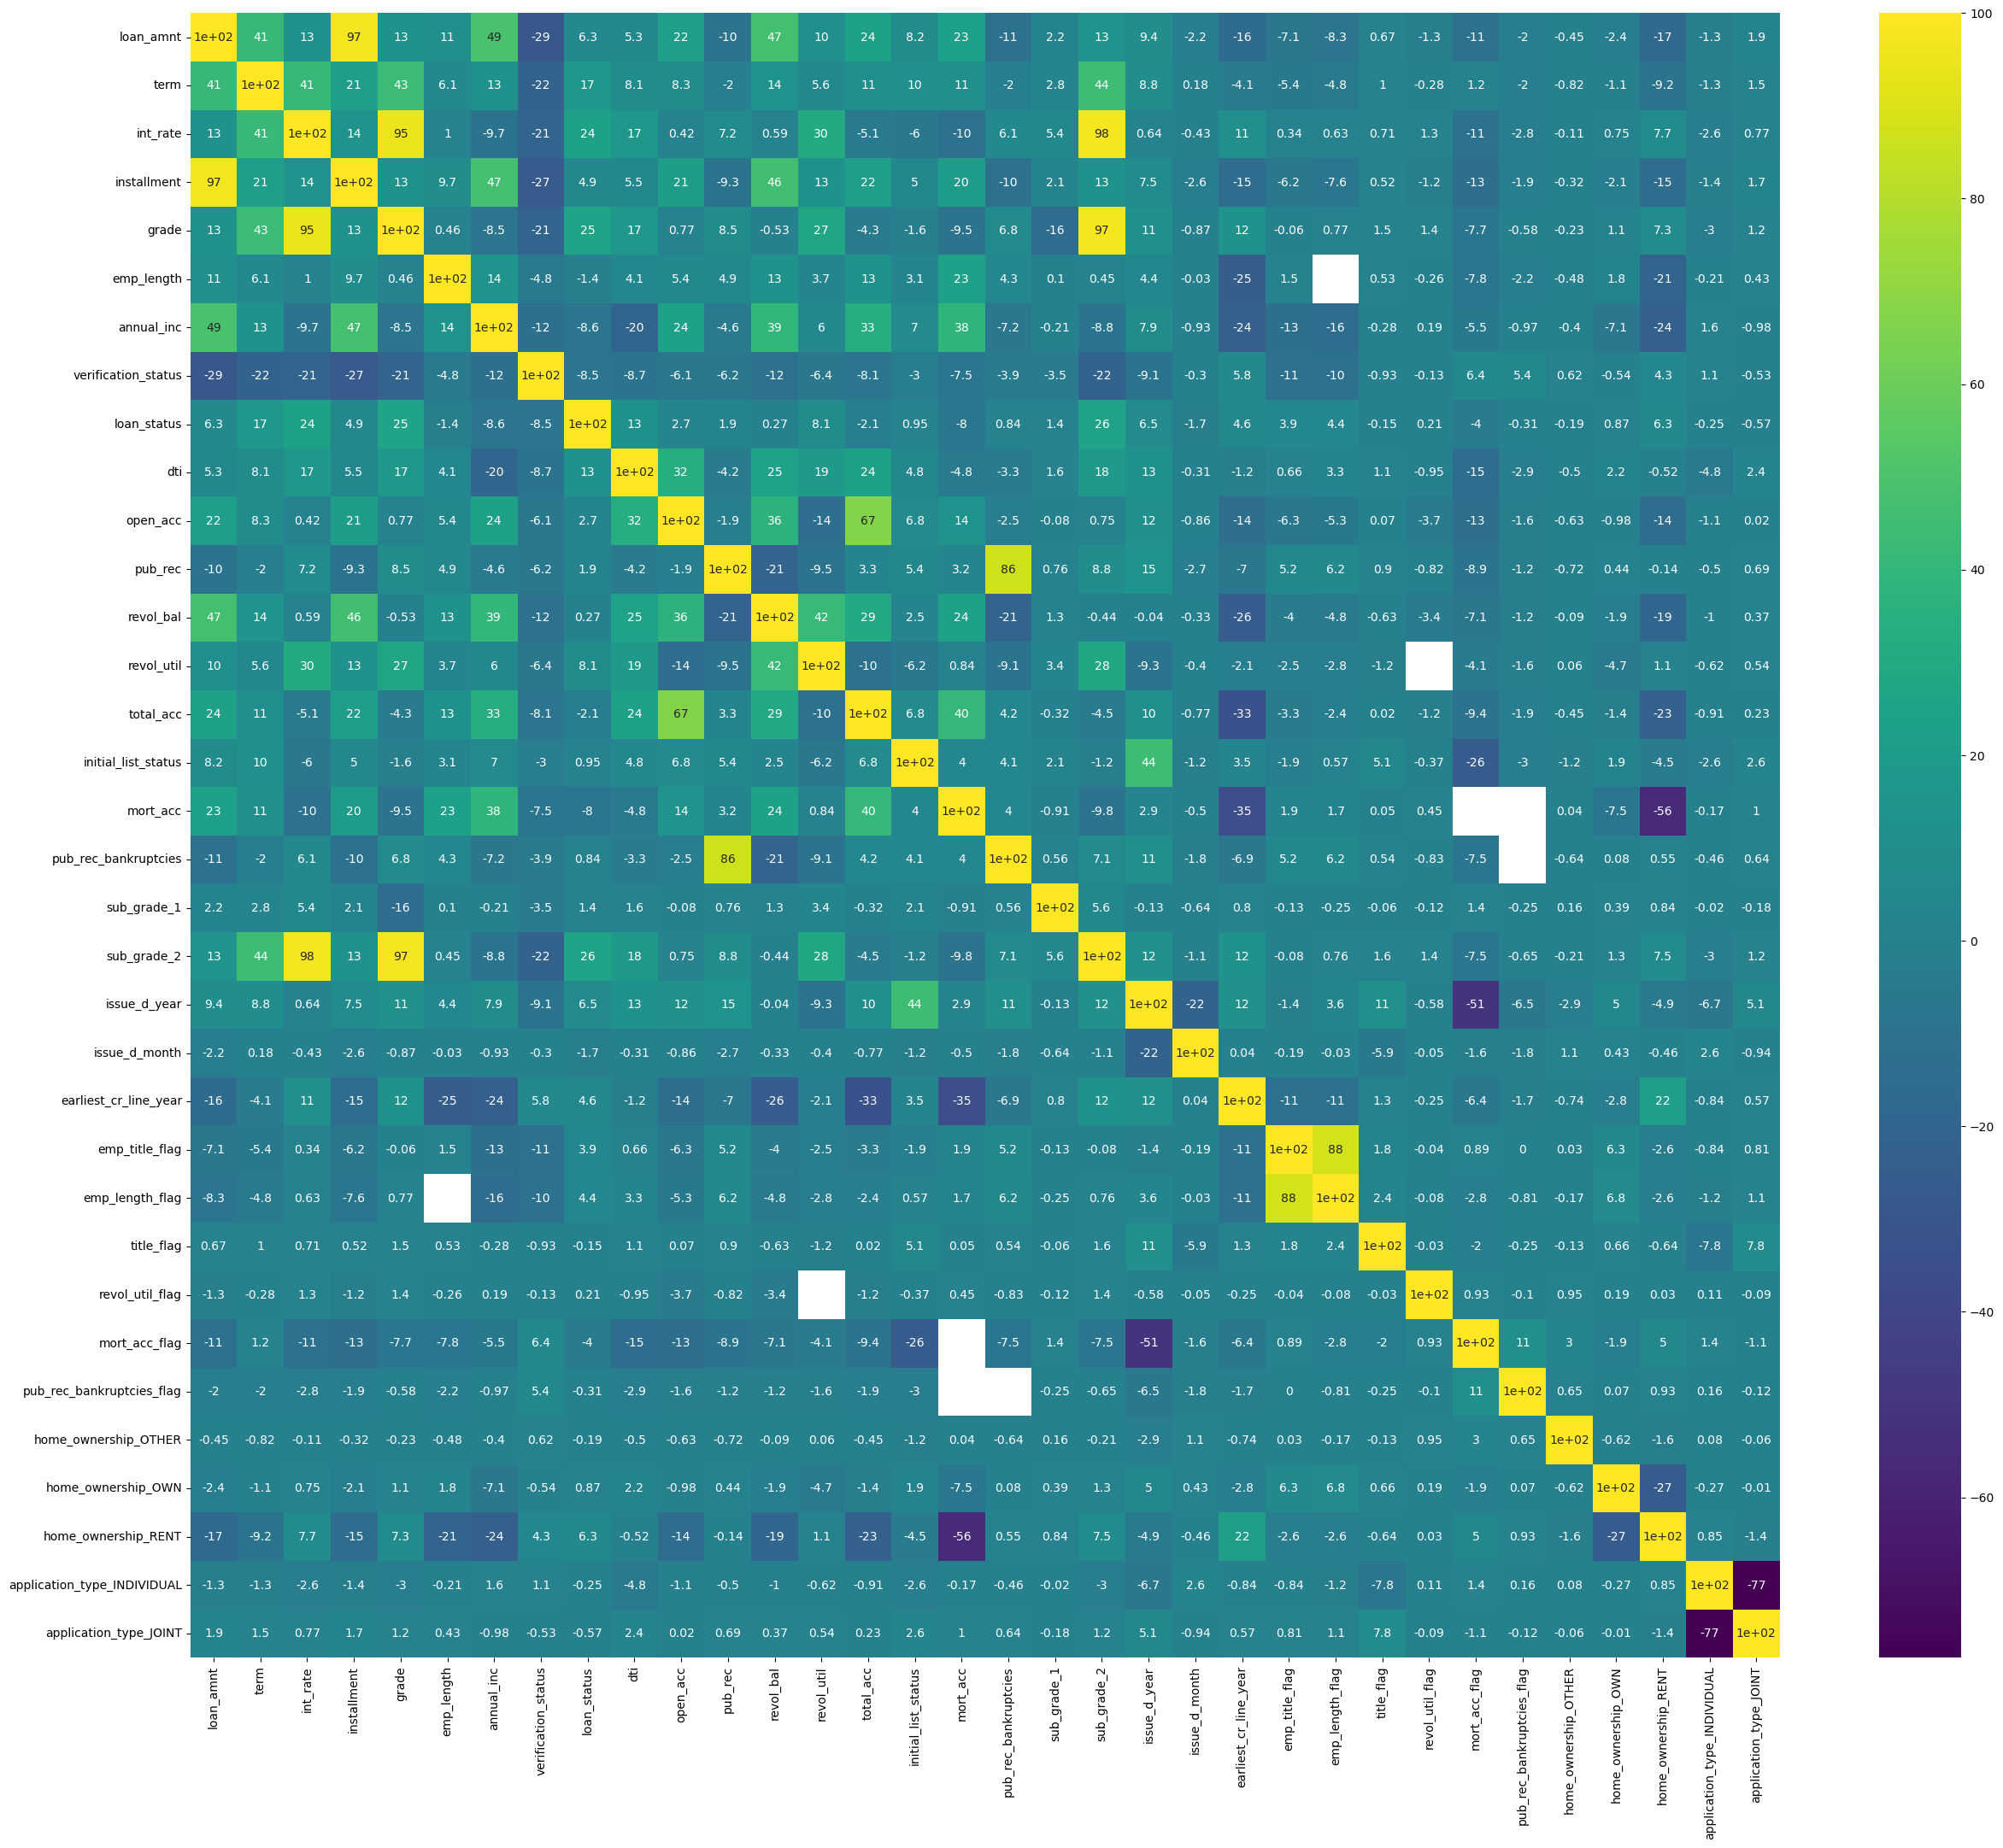

In [213]:
plt.figure(figsize=(30, 25))
sns.heatmap(spearman_corr, annot=True, cmap='viridis')
plt.show()

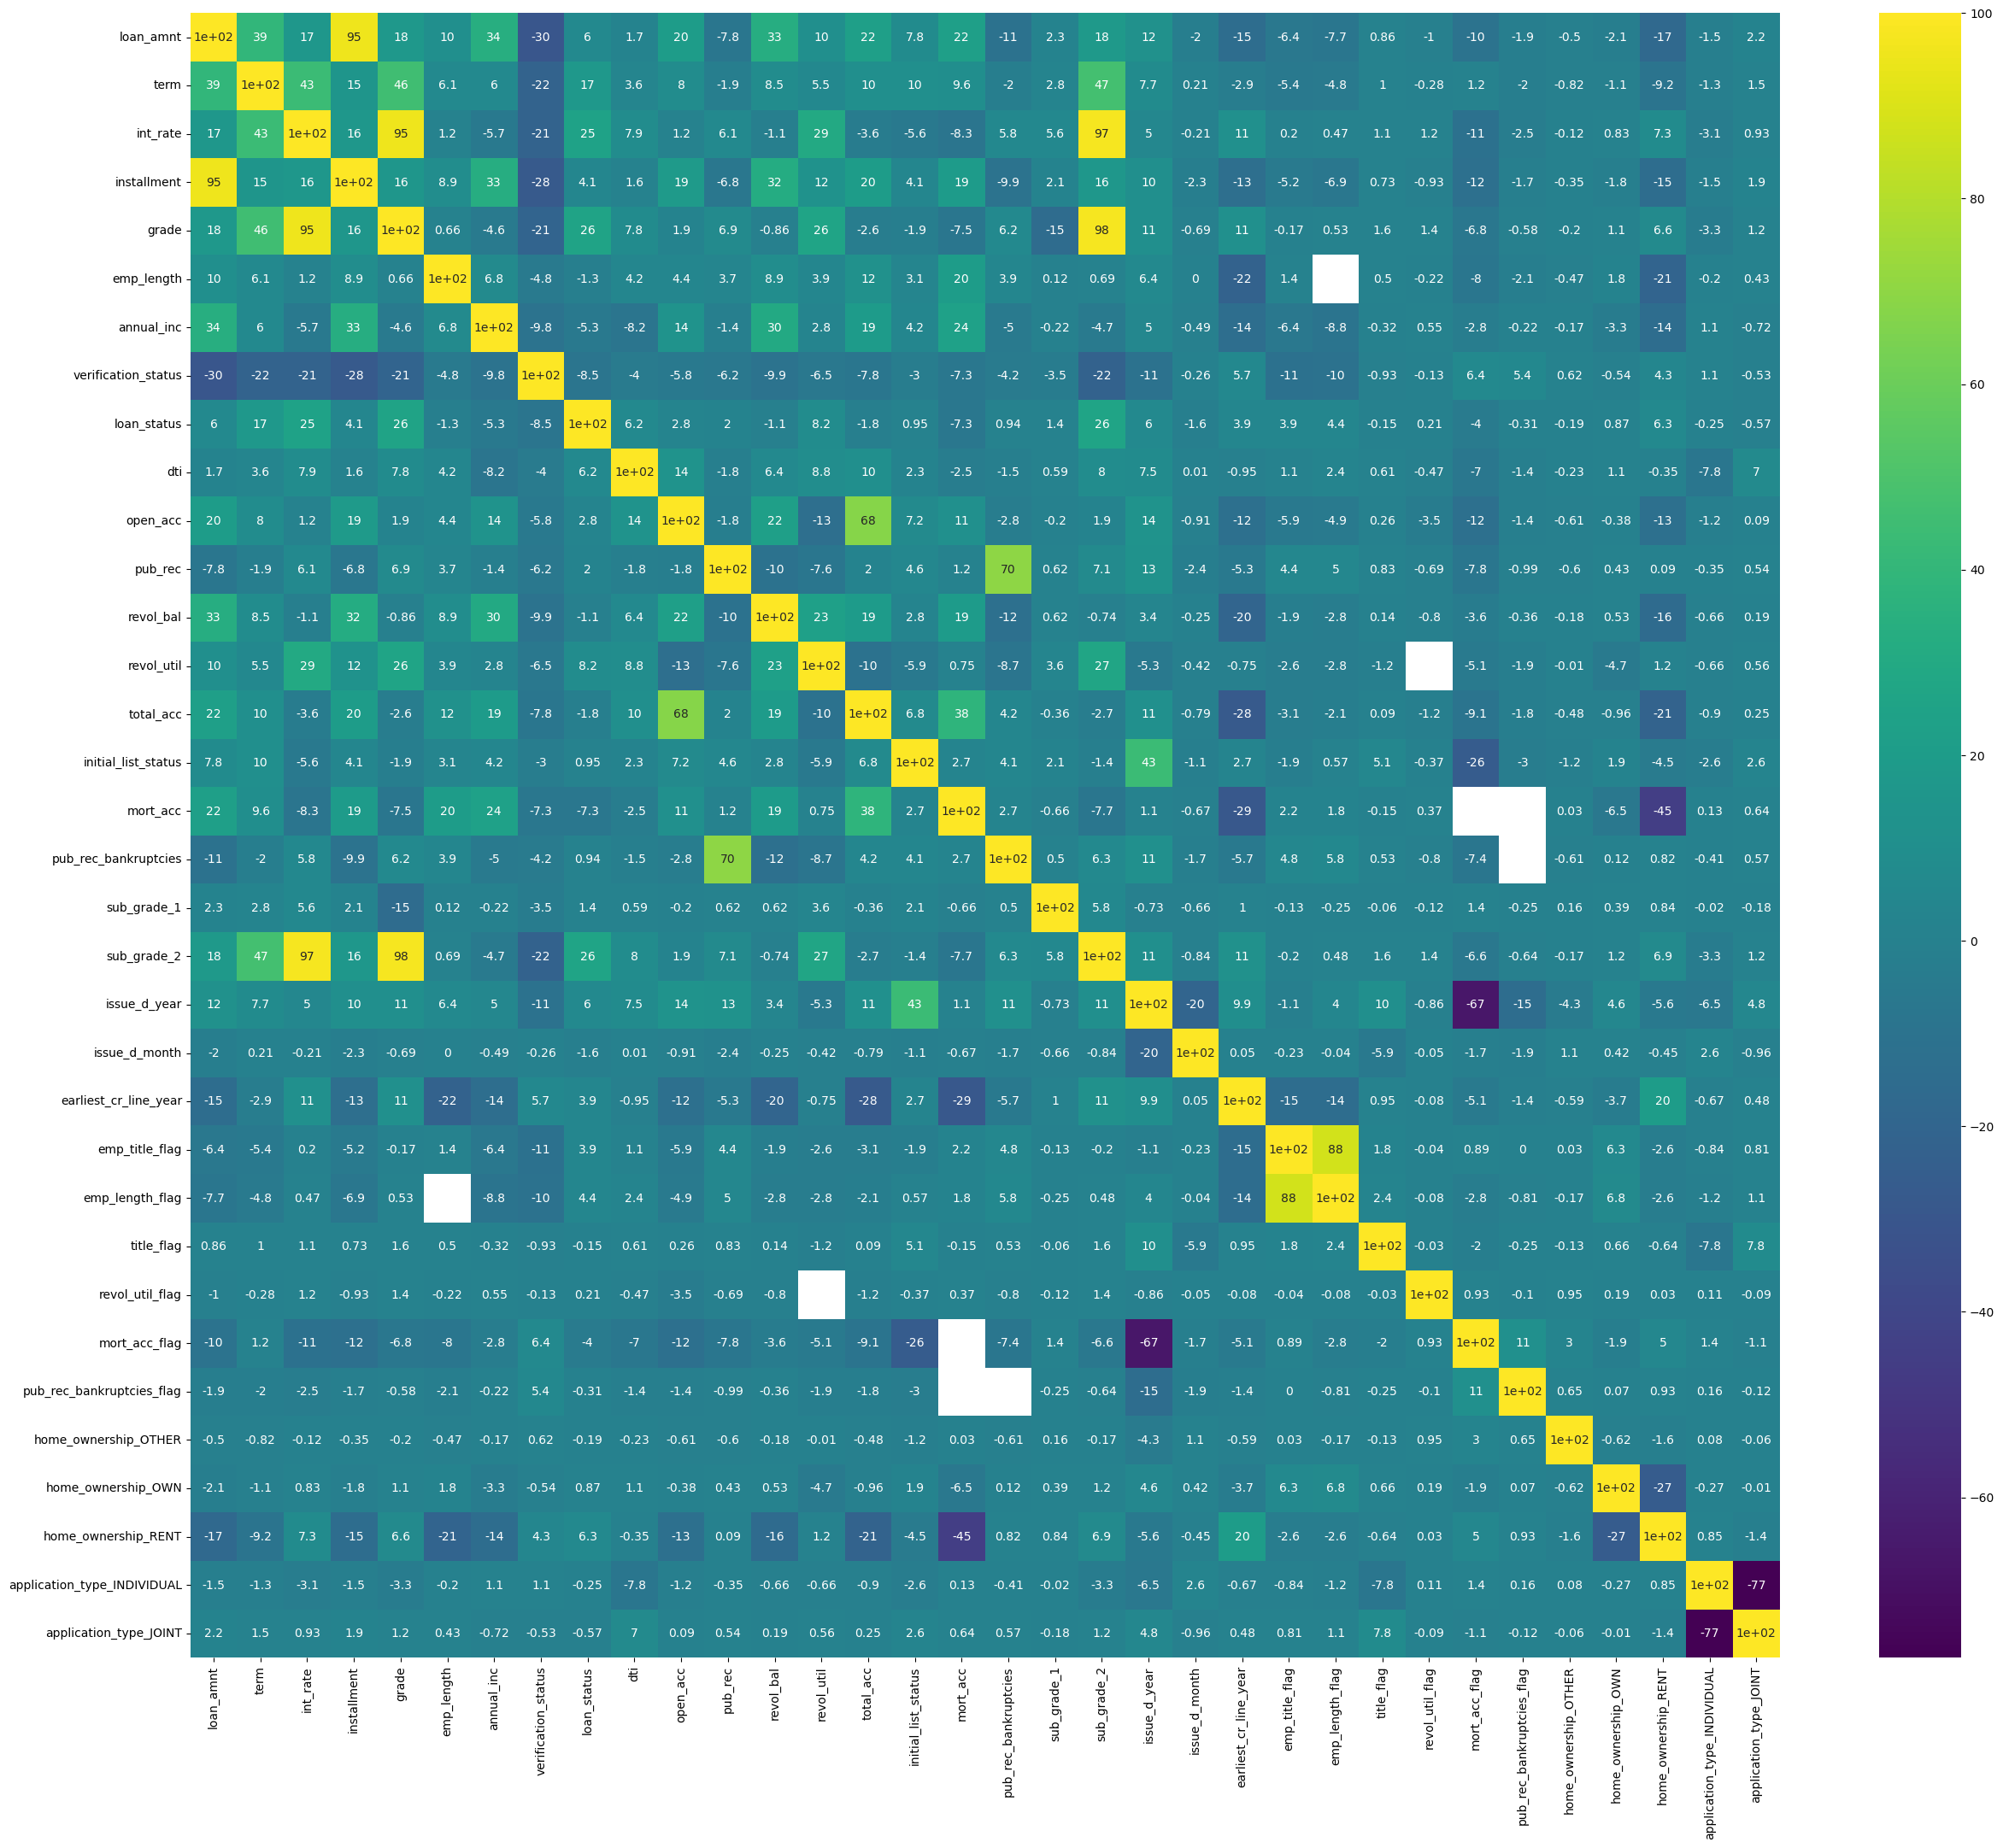

In [215]:
plt.figure(figsize=(30, 25))
sns.heatmap(pearson_corr, annot=True, cmap='viridis')
plt.show()

In [62]:
data.describe()

,loan_amnt,term,int_rate,installment,grade,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,sub_grade_1,sub_grade_2,issue_d_month,issue_d_year,earliest_cr_line_year,emp_title_flag,emp_length_flag,title_flag,revol_util_flag,mort_acc_flag,pub_rec_bankruptcies_flag,emp_length_na,pub_rec_bankruptcies_bool,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_INDIVIDUAL,application_type_JOINT,address_05113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.00000,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,41.698053,13.639400,431.849698,1.822337,11.067137,0.31584,0.196129,2.784225,11.311153,0.145842,1.584454e+04,25.414744,0.398869,2.971798,12.083481,6.553188,2013.629074,1997.857667,0.057892,0.046211,0.004431,0.000697,0.095435,0.001351,5.744257,0.115269,0.000369,0.095311,0.403480,0.998205,0.001073,0.114643,0.028346,0.142734,0.114817,0.142782,0.141194,0.143891,0.027728,0.028157
std,8357.441341,10.212038,4.472157,250.727790,1.333809,0.524600,0.46485,0.397068,0.553188,5.137649,0.352949,2.059184e+04,11.886991,0.489666,1.406773,6.600958,3.426622,1.481725,7.198387,0.233540,0.209942,0.066422,0.026390,0.293815,0.036730,3.660192,0.319347,0.019197,0.293644,0.490596,0.042333,0.032741,0.318591,0.165961,0.349802,0.318801,0.349851,0.348222,0.350979,0.164192,0.165421
min,500.000000,36.000000,5.320000,16.080000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,1.000000,1.000000,1.000000,2007.000000,1944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,1.000000,10.714440,0.00000,0.000000,2.507972,8.000000,0.000000,6.025000e+03,17.000000,0.000000,2.000000,7.000000,4.000000,2013.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,2.000000,11.066654,0.00000,0.000000,2.885359,10.000000,0.000000,1.118100e+04,24.000000,0.000000,3.000000,11.000000,7.000000,2014.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,3.000000,11.407576,1.00000,0.000000,3.177220,14.000000,0.000000,1.962000e+04,32.000000,1.000000,4.000000,16.000000,10.000000,2015.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,6.000000,15.979590,1.00000,1.000000,9.210340,90.000000,1.000000,1.743266e+06,151.000000,1.000000,5.000000,35.000000,12.000000,2016.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
data.isna().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
annual_inc                     0
verification_status            0
loan_status                    0
dti                            0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
initial_list_status            0
sub_grade_1                    0
sub_grade_2                    0
issue_d_month                  0
issue_d_year                   0
earliest_cr_line_year          0
emp_title_flag                 0
emp_length_flag                0
title_flag                     0
revol_util_flag                0
mort_acc_flag                  0
pub_rec_bankruptcies_flag      0
emp_length_na                  0
pub_rec_bankruptcies_bool      0
home_ownership_OTHER           0
home_ownership_OWN             0
home_ownership_RENT            0
applicatio

In [277]:
X = data.drop(columns=['loan_status']+[col for col in data.columns if col.startswith('address')])
y = data['loan_status']

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, stratify=y, random_state=42)

In [279]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((297022, 21), (99008, 21), (297022,), (99008,))

In [280]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [281]:
model = LogisticRegression(max_iter=1000,class_weight='balanced')

In [282]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [283]:
model.score(X_train,y_train)

0.6557393055059895

In [284]:
y_pred = model.predict(X_test)

In [285]:
model.score(X_test,y_test)

0.6567853102779574

In [286]:
pd.DataFrame((zip(X.columns,(model.coef_[0]).round(5)))).sort_values(by=1,ascending=False)

,0,1
1,grade,0.66446
7,sub_grade_1,0.14852
19,home_ownership_RENT,0.14754
3,open_acc,0.08107
9,emp_title_flag,0.05339
10,emp_length_flag,0.05301
18,home_ownership_OWN,0.05032
4,pub_rec,0.04212
6,initial_list_status,0.01952
14,pub_rec_bankruptcies_flag,0.01669


In [287]:
print(confusion_matrix(y_test, y_test))

[[79590     0]
 [    0 19418]]


In [253]:
print(confusion_matrix(y_test, y_pred))

[[77268 18239]
 [ 4925 18377]]


In [288]:
print(confusion_matrix(y_test, y_pred))

[[52927 26663]
 [ 7318 12100]]


In [289]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76     79590
           1       0.31      0.62      0.42     19418

    accuracy                           0.66     99008
   macro avg       0.60      0.64      0.59     99008
weighted avg       0.77      0.66      0.69     99008



In [638]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     95507
           1       0.51      0.79      0.62     23302

    accuracy                           0.81    118809
   macro avg       0.73      0.81      0.75    118809
weighted avg       0.86      0.81      0.83    118809



In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76     95507
           1       0.32      0.62      0.42     23302

    accuracy                           0.67    118809
   macro avg       0.60      0.65      0.59    118809
weighted avg       0.77      0.67      0.70    118809



In [271]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     95507
           1       0.50      0.07      0.13     23302

    accuracy                           0.80    118809
   macro avg       0.66      0.53      0.51    118809
weighted avg       0.75      0.80      0.74    118809



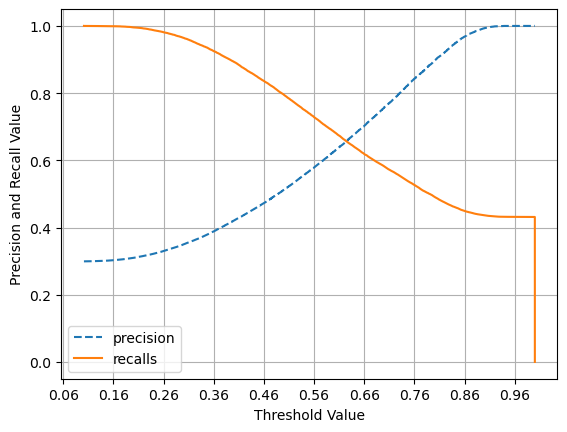

In [91]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:,1])

In [93]:
def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif


In [97]:
X.drop(columns='grade').head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,sub_grade_1,sub_grade_2,issue_d_month,issue_d_year,earliest_cr_line_year,emp_title_flag,emp_length_flag,title_flag,revol_util_flag,mort_acc_flag,pub_rec_bankruptcies_flag,emp_length_na,pub_rec_bankruptcies_bool,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_INDIVIDUAL,application_type_JOINT,address_05113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700
0,10000.0,36,11.44,329.48,11.669938,1,3.304686,16.0,0,36369.0,25.0,1,4,9,1,2015,1990,0,0,0,0,0,0,10.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,11.082158,1,3.137666,17.0,0,20131.0,27.0,0,5,10,1,2015,2004,0,0,0,0,0,0,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,10.670303,0,2.623944,13.0,0,11987.0,26.0,0,3,8,1,2015,2007,0,0,0,0,0,0,1.0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,10.896758,1,1.280934,6.0,0,5472.0,13.0,0,2,2,11,2014,2006,0,0,0,0,0,0,6.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,10.915107,0,3.553918,13.0,0,24584.0,43.0,0,5,15,4,2013,1999,0,0,0,0,0,0,9.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [139]:
X['emi_2_inc'] = 12.0*X['installment']/(X['annual_inc']+0.2)

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

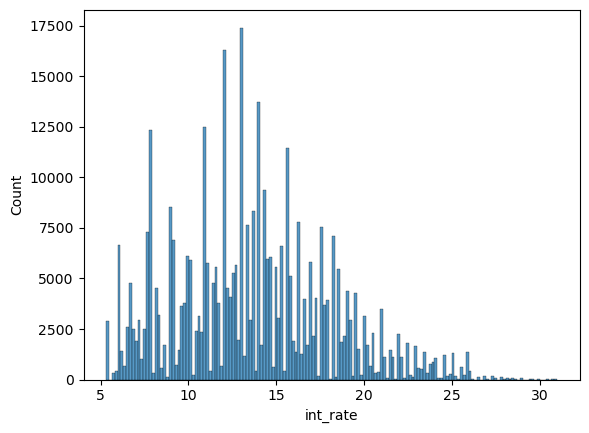

In [199]:
sns.histplot((data['int_rate']))

In [140]:
# X['annual_inc'].value_counts().head(20)

In [275]:
X = data.drop(columns=['sub_grade_2','issue_d_year','earliest_cr_line_year','application_type_INDIVIDUAL',
                        'int_rate','loan_amnt','annual_inc','dti','term','total_acc','loan_status'])

In [240]:
df1 = data.drop(columns=['sub_grade_2','issue_d_year','earliest_cr_line_year','application_type_INDIVIDUAL',
                        'int_rate','loan_amnt','annual_inc','dti','term','total_acc','loan_status'])

In [241]:
vif_result = calc_vif(df1)

In [242]:
vif_result

,Feature,VIF
3,open_acc,5.61
10,emp_length_flag,4.81
7,sub_grade_1,4.81
4,pub_rec,4.78
0,installment,4.71
9,emp_title_flag,4.70
16,pub_rec_bankruptcies_bool,4.64
8,issue_d_month,4.12
15,emp_length_na,3.74
1,grade,3.06


In [203]:
# vif_result

In [190]:
spearman_corr = data[[col for col in X.columns if col.startswith('address')]+['loan_status']].corr()

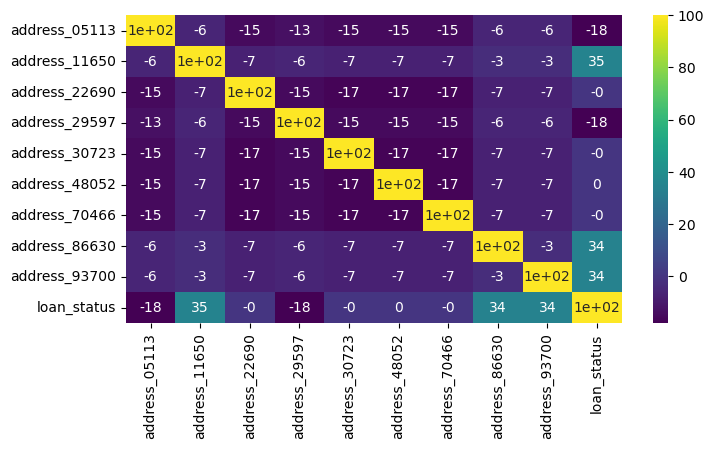

In [191]:
plt.figure(figsize=(8, 4))
sns.heatmap(100*spearman_corr.round(2), annot=True, cmap='viridis')
plt.show()

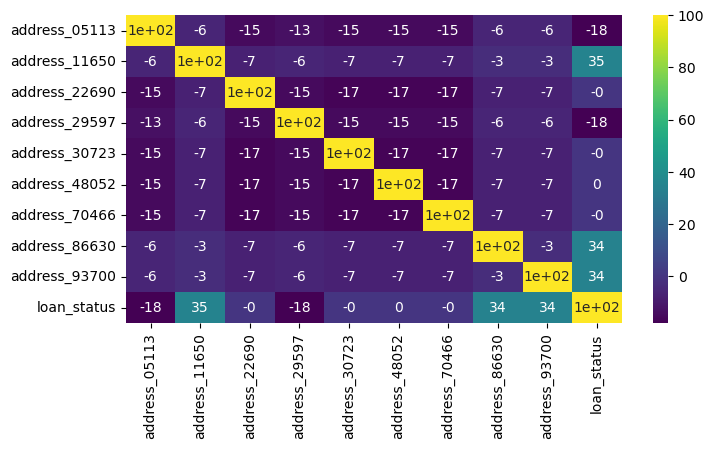

In [189]:
plt.figure(figsize=(8, 4))
sns.heatmap(100*spearman_corr.round(2), annot=True, cmap='viridis')
plt.show()

In [266]:
lr1.score(X_train, y_train)

0.803337409503609

In [267]:
lr1.score(X_test, y_test)

0.804568677457095

In [259]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [260]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (445700, 30)
After OverSampling, the shape of train_y: (445700,) 

After OverSampling, counts of label '1': 222850
After OverSampling, counts of label '0': 222850


In [265]:
lr1 = LogisticRegression(max_iter=5000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     95507
           1       0.50      0.79      0.61     23302

    accuracy                           0.80    118809
   macro avg       0.72      0.80      0.74    118809
weighted avg       0.85      0.80      0.82    118809



In [264]:
lr1 = LogisticRegression(max_iter=5000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_train_res)
  
# Classification Report
print(classification_report(y_train_res, predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80    222850
           1       0.80      0.78      0.79    222850

    accuracy                           0.80    445700
   macro avg       0.80      0.80      0.80    445700
weighted avg       0.80      0.80      0.80    445700



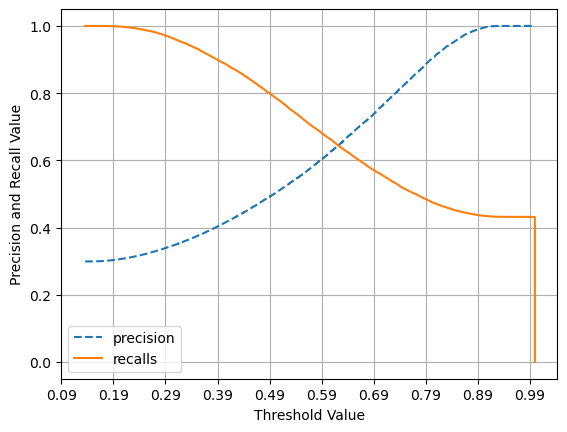

In [263]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

In [268]:
pd.DataFrame((zip(X.columns,(lr1.coef_[0]).round(5)))).sort_values(by=1,ascending=False)

,0,1
22,address_11650,3.32264
28,address_86630,3.30356
29,address_93700,3.27837
27,address_70466,3.05751
25,address_30723,3.05410
26,address_48052,3.05317
23,address_22690,3.04533
1,grade,0.69913
7,sub_grade_1,0.14670
19,home_ownership_RENT,0.13839
